<a href="https://colab.research.google.com/github/jsleroux/ReinforcementLearningProjects/blob/master/Multi_Armed_Bandits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

In [0]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1
!pip install torch==1.0.0 > /dev/null 2>&1

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (41.0.1)


In [0]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor

gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from collections import deque
%matplotlib inline

import math
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

In [0]:
!git clone https://github.com/JKCooper2/gym-bandits.git > /dev/null 2>&1
!pip install /content/gym-bandits/. > /dev/null 2>&1

In [0]:
import gym_bandits

In [0]:
env = gym.make('BanditTenArmedGaussian-v0')

In [0]:
%%time
env.reset()
epsilon = 0.1
runs = 2000
steps = 1000

results = np.ndarray([steps, runs], dtype=np.float16)

for run in range(runs):
    qvalues = np.zeros([env.action_space.n])
    nvalues = np.zeros([env.action_space.n])

    for step in range(steps):
        if random.random() < epsilon:
            action = env.action_space.sample()
            observation, reward, done, info = env.step(action)

        else:
            # Make sure to not always take the same action when random
            action = np.random.choice(np.flatnonzero(qvalues == qvalues.max()))
            observation, reward, done, info = env.step(action)

        nvalues[action] += 1
        qvalues[action] = qvalues[action] + (reward - qvalues[action]) / nvalues[action]        

        results[step, run] = reward
            
    if run%250 == 0:
        print(run)

0
250
500
750
1000
1250
1500
1750
CPU times: user 49.8 s, sys: 112 ms, total: 49.9 s
Wall time: 49.8 s


In [0]:
graph = pd.DataFrame()
graph['0.1'] = results.mean(axis=1)

In [0]:
%%time
env.reset()
epsilon = 0.01
runs = 2000
steps = 1000

results = np.ndarray([steps, runs], dtype=np.float16)

for run in range(runs):
    qvalues = np.zeros([env.action_space.n])
    nvalues = np.zeros([env.action_space.n])

    for step in range(steps):
        if random.random() < epsilon:
            action = env.action_space.sample()
            observation, reward, done, info = env.step(action)

        else:
            # Make sure to not always take the same action when random
            action = np.random.choice(np.flatnonzero(qvalues == qvalues.max()))
            observation, reward, done, info = env.step(action)

        nvalues[action] += 1
        qvalues[action] = qvalues[action] + (reward - qvalues[action]) / nvalues[action]        

        results[step, run] = reward
            
    if run%250 == 0:
        print(run)

0
250
500
750
1000
1250
1500
1750
CPU times: user 56.4 s, sys: 122 ms, total: 56.5 s
Wall time: 56.3 s


In [0]:
graph['0.01'] = results.mean(axis=1)

In [0]:
%%time
env.reset()
epsilon = 0
runs = 2000
steps = 1000

results = np.ndarray([steps, runs], dtype=np.float16)

for run in range(runs):
    qvalues = np.zeros([env.action_space.n])
    nvalues = np.zeros([env.action_space.n])

    for step in range(steps):
        if random.random() < epsilon:
            action = env.action_space.sample()
            observation, reward, done, info = env.step(action)

        else:
            # Make sure to not always take the same action when random
            action = np.random.choice(np.flatnonzero(qvalues == qvalues.max()))
            observation, reward, done, info = env.step(action)

        nvalues[action] += 1
        qvalues[action] = qvalues[action] + (reward - qvalues[action]) / nvalues[action]        

        results[step, run] = reward
            
    if run%250 == 0:
        print(run)

0
250
500
750
1000
1250
1500
1750
CPU times: user 57.7 s, sys: 131 ms, total: 57.8 s
Wall time: 57.6 s


In [0]:
graph['0 (greedy)'] = results.mean(axis=1)

Text(0, 0.5, 'Average reward')

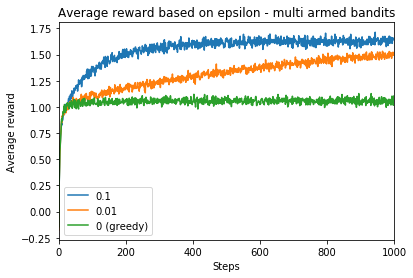

In [0]:
ax = graph.plot(title='Average reward based on epsilon - multi armed bandits')
ax.set_xlabel('Steps')
ax.set_ylabel('Average reward')